# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [5]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [6]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [24]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.shape)

(307511, 122)


In [2]:
dtype_select = ['float','float64','int','int32','int64']
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

coefDict = {}

for col in numeric_columns:
    q_50 = np.percentile(app_train[~app_train[col].isnull()][col], q = 50)
    app_train.loc[app_train[col].isnull(),col] = q_50
    coefDict[col] = np.corrcoef(app_train[col], app_train['TARGET'])[0][1]

for key, value in sorted(coefDict.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))
    

EXT_SOURCE_2: -0.16029475320996664
EXT_SOURCE_3: -0.15589168562406433
EXT_SOURCE_1: -0.09888661450126432
AMT_GOODS_PRICE: -0.03962326045768466
FLOORSMAX_AVG: -0.039385456273441984
FLOORSMAX_MEDI: -0.03915720851589431
FLOORSMAX_MODE: -0.038377086086273396
REGION_POPULATION_RELATIVE: -0.03722714854244539
ELEVATORS_AVG: -0.03585309175037309
ELEVATORS_MEDI: -0.035551514435379614
ELEVATORS_MODE: -0.03422022818661834
AMT_CREDIT: -0.030369286461429768
TOTALAREA_MODE: -0.030213971215774838
LIVINGAREA_AVG: -0.029463532577547503
LIVINGAREA_MEDI: -0.02935920362717153
LIVINGAREA_MODE: -0.027883747174648615
APARTMENTS_MEDI: -0.0268411259388263
APARTMENTS_AVG: -0.0267338330757482
APARTMENTS_MODE: -0.025418444742105546
FLOORSMIN_AVG: -0.021158335968407018
FLOORSMIN_MEDI: -0.020995426526855838
FLOORSMIN_MODE: -0.020147305718976428
LIVINGAPARTMENTS_AVG: -0.01926200011059182
LIVINGAPARTMENTS_MEDI: -0.019138024052427503
LIVINGAPARTMENTS_MODE: -0.018828817397829226
NONLIVINGAREA_AVG: -0.01818677940186295


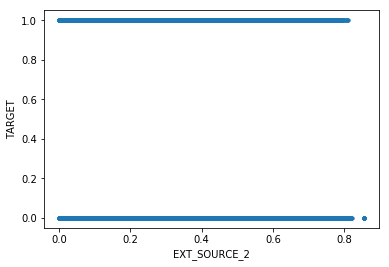

In [3]:
plt.plot(app_train['EXT_SOURCE_2'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_2')
plt.ylabel('TARGET')
plt.show()


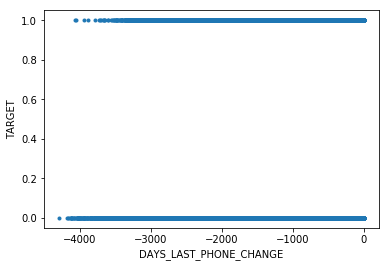

In [4]:
plt.plot(app_train['DAYS_LAST_PHONE_CHANGE'], app_train['TARGET'], '.')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')
plt.ylabel('TARGET')
plt.show()